In [9]:
import os

from langchain_experimental.graph_transformers import LLMGraphTransformer
from langchain_ollama import ChatOllama

llm = ChatOllama(
    model="llama3.1",
    temperature=0,
)
llm_transformer = LLMGraphTransformer(llm=llm)

In [2]:
from langchain_core.documents import Document

text = """
Marie Curie, born in 1867, was a Polish and naturalised-French physicist and chemist who conducted pioneering research on radioactivity.
She was the first woman to win a Nobel Prize, the first person to win a Nobel Prize twice, and the only person to win a Nobel Prize in two scientific fields.
Her husband, Pierre Curie, was a co-winner of her first Nobel Prize, making them the first-ever married couple to win the Nobel Prize and launching the Curie family legacy of five Nobel Prizes.
She was, in 1906, the first woman to become a professor at the University of Paris.
"""
documents = [Document(page_content=text)]
graph_documents = llm_transformer.convert_to_graph_documents(documents)
print(f"Nodes:{graph_documents[0].nodes}")
print(f"Relationships:{graph_documents[0].relationships}")

Nodes:[]
Relationships:[]


In [52]:
import os
from langchain_core.documents import Document
from langchain_experimental.graph_transformers import LLMGraphTransformer
from langchain_community.llms.ollama import Ollama

# Load the locally hosted model
model_path = 'llama3.1'
llm = Ollama(model=model_path)

# Set the temperature parameter if needed
llm.temperature = 0

# Initialize the transformer with the local model
llm_transformer = LLMGraphTransformer(llm=llm)

# Sample text
text = """
Marie Curie, born in 1867, was a Polish and naturalised-French physicist and chemist who conducted pioneering research on radioactivity.
She was the first woman to win a Nobel Prize, the first person to win a Nobel Prize twice, and the only person to win a Nobel Prize in two scientific fields.
Her husband, Pierre Curie, was a co-winner of her first Nobel Prize, making them the first-ever married couple to win the Nobel Prize and launching the Curie family legacy of five Nobel Prizes.
She was, in 1906, the first woman to become a professor at the University of Paris.
"""

# Create a document
documents = [Document(page_content=text)]

# Convert to graph documents
graph_documents = llm_transformer.convert_to_graph_documents(documents)

# Print nodes and relationships
print(f"Nodes: {graph_documents[0].nodes}")
print(f"Relationships: {graph_documents[0].relationships}")
fu()

Nodes: [Node(id='1867', type='Year'), Node(id='woman', type='Demographic'), Node(id='Pierre Curie', type='Person'), Node(id='person', type='Demographic'), Node(id='physicist and chemist', type='Occupation'), Node(id='radioactivity', type='Field of Study'), Node(id='University of Paris', type='Institution'), Node(id='Marie Curie', type='Person')]
Relationships: [Relationship(source=Node(id='Marie Curie', type='Person'), target=Node(id='1867', type='Year'), type='BORN_IN'), Relationship(source=Node(id='Marie Curie', type='Person'), target=Node(id='physicist and chemist', type='Occupation'), type='WORKED_AS_PHYSICIST'), Relationship(source=Node(id='Marie Curie', type='Person'), target=Node(id='radioactivity', type='Field of Study'), type='CONDUCTED_RESEARCH_ON'), Relationship(source=Node(id='Marie Curie', type='Person'), target=Node(id='woman', type='Demographic'), type='FIRST_TO_WIN_NOBEL_PRIZE_AS'), Relationship(source=Node(id='Marie Curie', type='Person'), target=Node(id='person', type

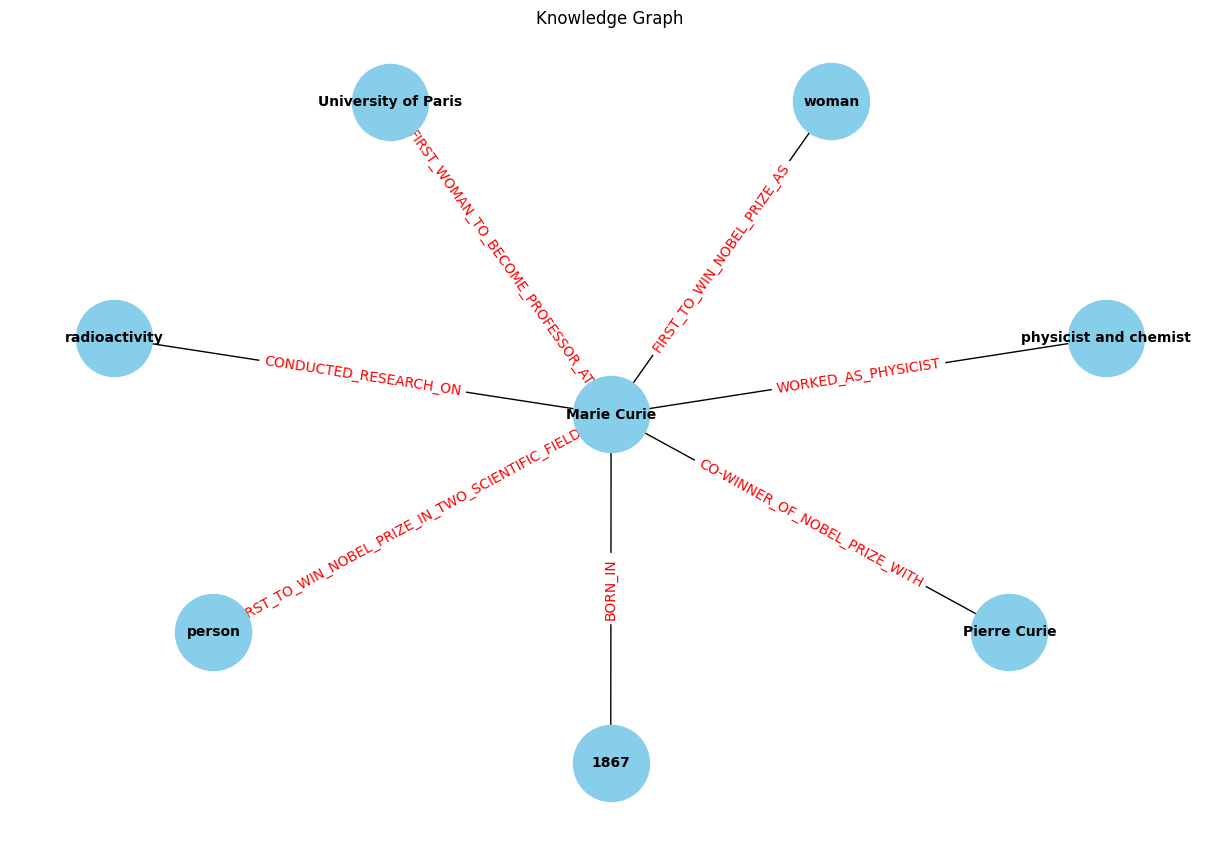

In [53]:
fu()

In [47]:
def fu():
    import networkx as nx
    import matplotlib.pyplot as plt
    nodes = graph_documents[0].nodes
    relationships = graph_documents[0].relationships
    G = nx.Graph()

    # Add nodes to the graph
    for node in nodes:
        G.add_node(node.id, label=node.type)

    # Add edges to the graph
    for rel in relationships:
        G.add_edge(rel.source.id, rel.target.id, label=rel.type)

    # Plot the graph
    pos = nx.spring_layout(G)  # Positions for all nodes
    # Use node IDs as labels
    labels = {node.id: node.id for node in nodes}

    # Get edge labels
    edge_labels = nx.get_edge_attributes(G, 'label')

    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=3000,node_color='skyblue', font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    plt.title('Knowledge Graph')
    plt.show()

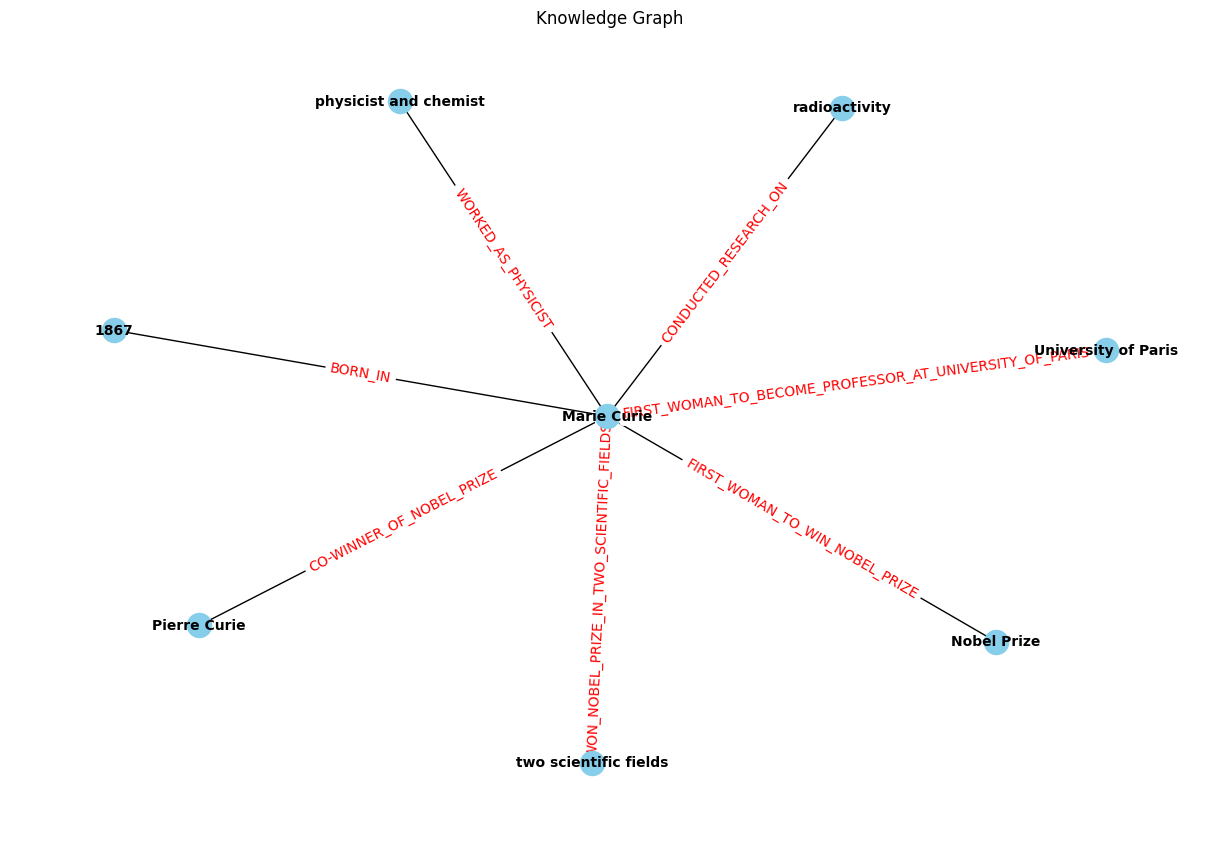

In [35]:
import networkx as nx
import matplotlib.pyplot as plt
nodes = graph_documents[0].nodes
relationships = graph_documents[0].relationships
G = nx.Graph()

# Add nodes to the graph
for node in nodes:
    G.add_node(node.id, label=node.type)

# Add edges to the graph
for rel in relationships:
    G.add_edge(rel.source.id, rel.target.id, label=rel.type)

# Plot the graph
pos = nx.spring_layout(G)  # Positions for all nodes
# Use node IDs as labels
labels = {node.id: node.id for node in nodes}

# Get edge labels
edge_labels = nx.get_edge_attributes(G, 'label')

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, labels=labels, node_size=300, node_color='skyblue', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title('Knowledge Graph')
plt.show()

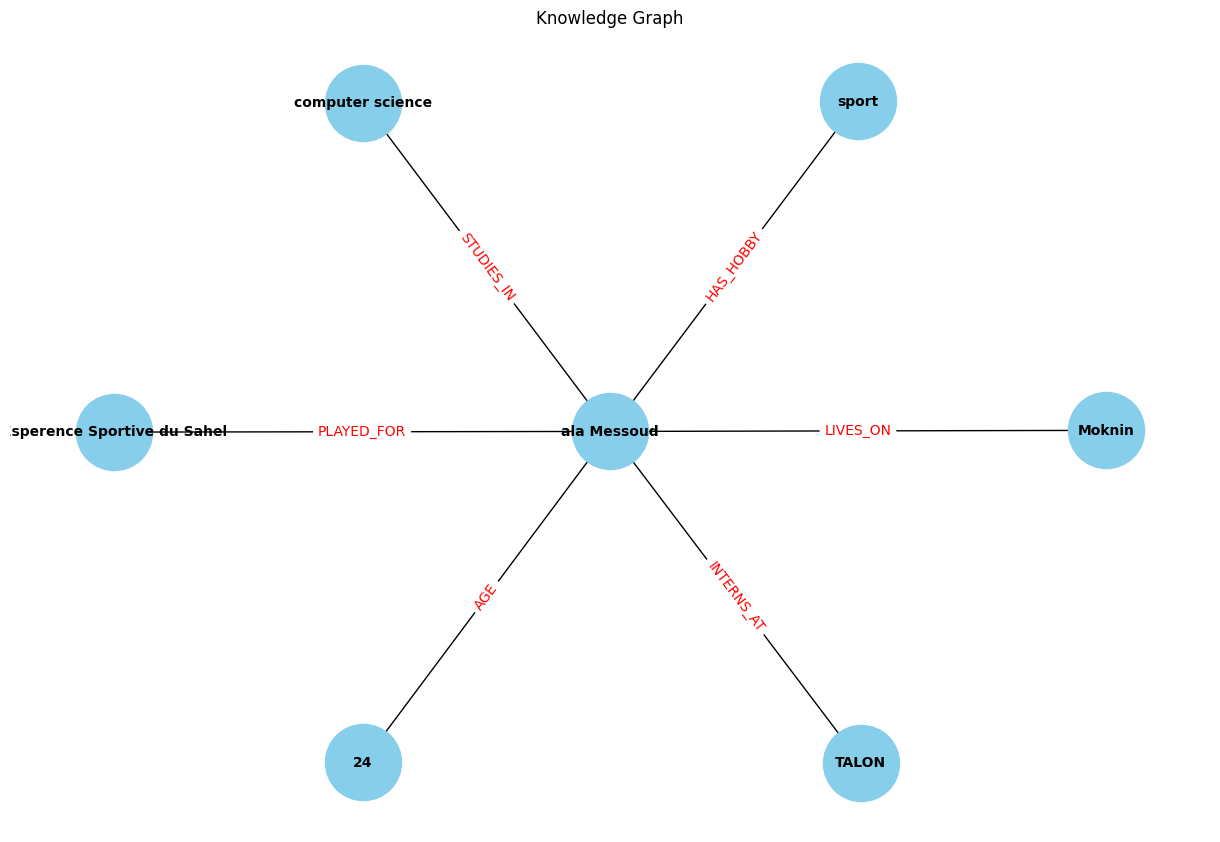

In [56]:
    graph1="""ala Messoud lives on Moknin near Monastir he is a computer science engineer student he is skilled on web developement
    his hobby is sport where he was a footballer on Esperence Sportive du Sahel he played there since 2005 now he has 24 years old 
    he is foccusing on his internship at TALON

"""

# Create a document
documents = [Document(page_content=graph1)]

# Convert to graph documents
graph_documents = llm_transformer.convert_to_graph_documents(documents)
fu()

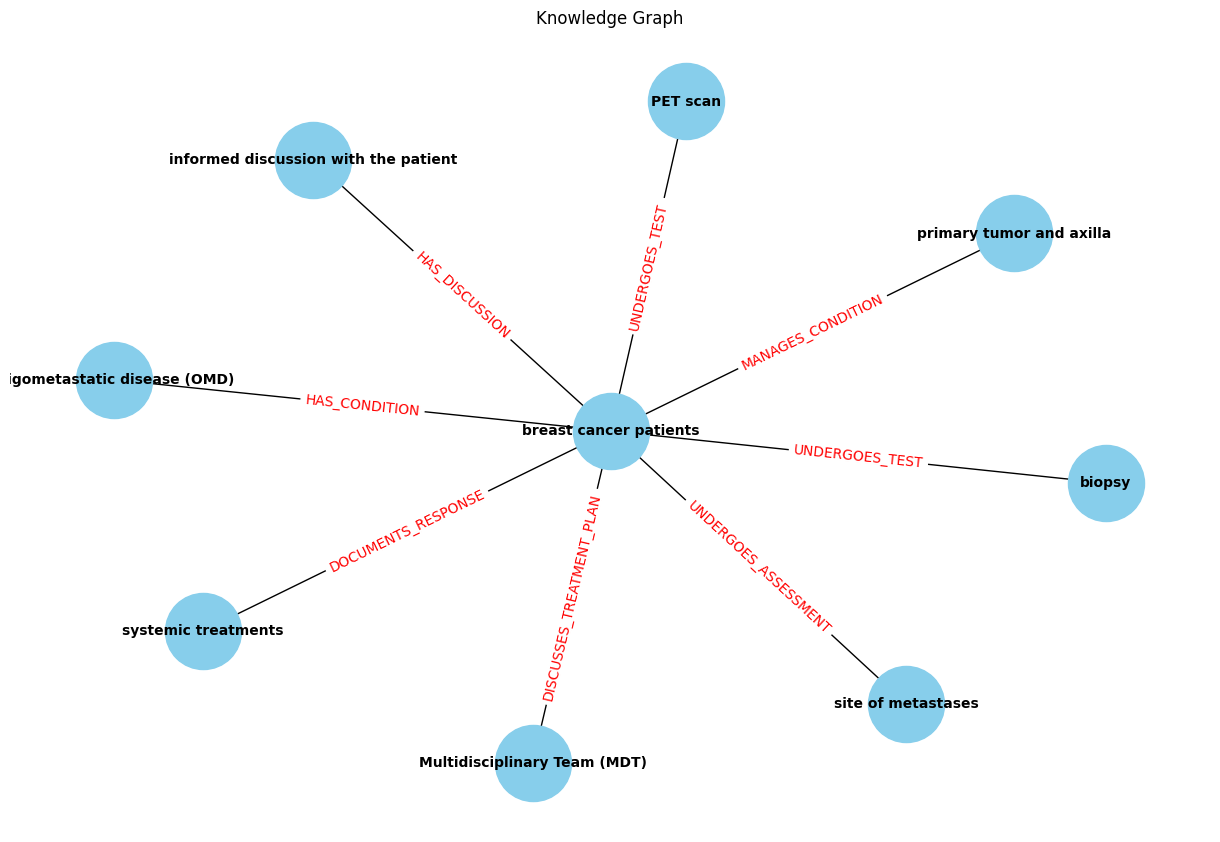

In [50]:
graph11="""The flowchart illustrates the protocol for managing breast cancer patients with suspected oligometastatic disease (OMD). It begins with an initial suspicion of OMD, prompting a biopsy to confirm the diagnosis. Once confirmed, systemic imaging, preferably with a PET scan, is carried out to stage the disease comprehensively. Following diagnosis:

-A Multidisciplinary Team (MDT) discussion is conducted to tailor the treatment plan.
-An informed discussion with the patient takes place to align expectations regarding treatment outcomes.
The treatment strategy involves:

-Assessing the site of metastases to determine specific treatment needs (CNS, bone, visceral, etc.).
-Managing the primary tumor and axilla in patients with synchronous OMD.
-Documenting responses to systemic treatments as a preliminary measure.
-Considering local treatments such as surgery, radiotherapy (RT), or radiofrequency ablation (RFA) based on the patient's response.
The protocol concludes with a decision to continue systemic treatment if it proves beneficial, adjusting the plan based on the patient's ongoing response and clinical progression.
"""
# Create a document
documents = [Document(page_content=graph11)]

# Convert to graph documents
graph_documents = llm_transformer.convert_to_graph_documents(documents)
fu()


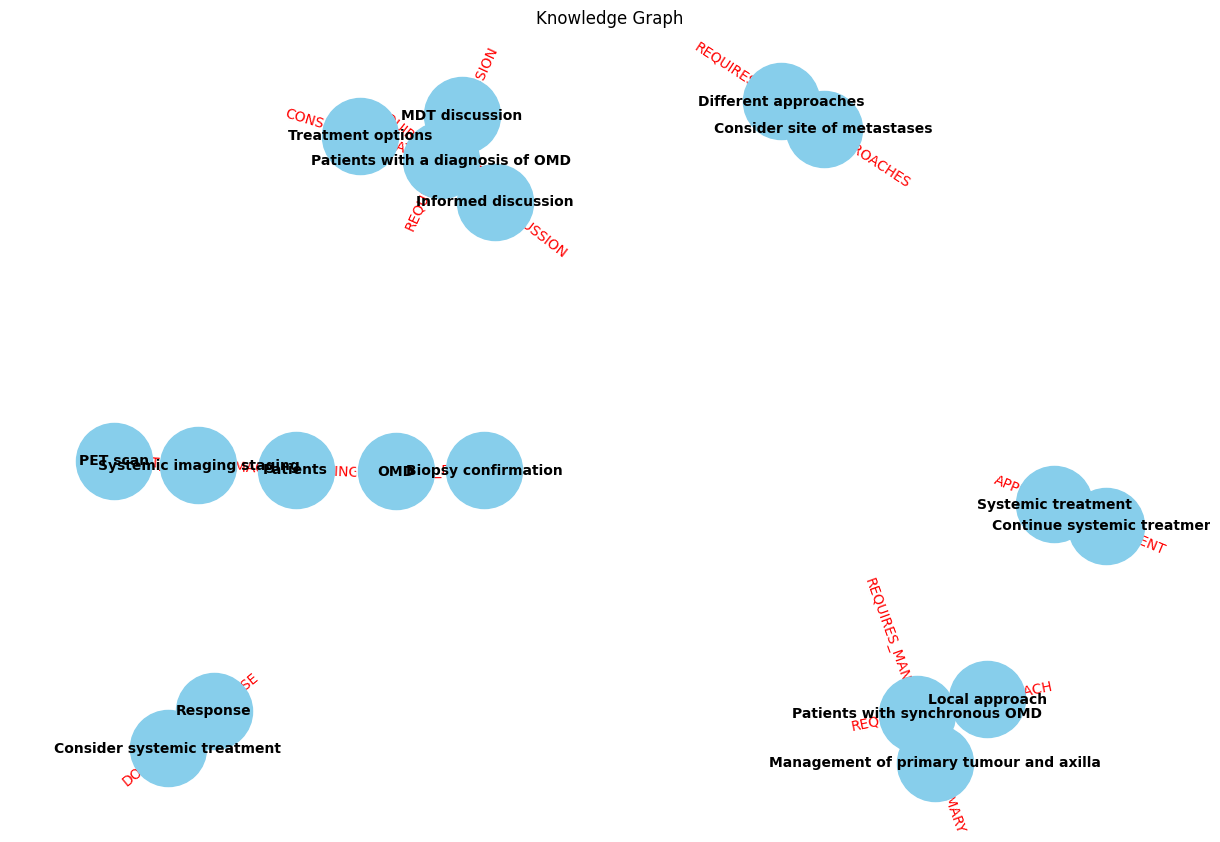

In [51]:
graph111="""
Patients with a suspicion of OMD should pass by

-Biopsy confirmation (when appropriate) and Systemic imaging staging and preferably with PET scan
first then :
-Patients with a diagnosis of OMD*
after that should do a  MDT discussion and Informed discussion with patient and aligning expectations
after that should consider all the folowing treatment :
-Consider site of metastases (CNS, bone, visceral, etc.) as they may require different approaches also Consider management of the primary tumour and axilla inpatients with synchronous OMD
Consider systemic treatment to document response as a first approach
Consider local approach (surgery, RT, RFA, etc.)
finally:
Continue systemic treatment when appropriatet

note that the order is important !
"""

# Create a document
documents = [Document(page_content=graph111)]

# Convert to graph documents
graph_documents = llm_transformer.convert_to_graph_documents(documents)
fu()